In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import collections

# Considere el modelo Beta-Binomial para la moneda

## Implemente el modelo en pycm3 para los priors Beta(1, 1) y Beta(50, 50)\*

\* Beta(100, 100) trae errores numéricos con los que no vale la pena lidiar

In [2]:
def foo(n, k_observed, alpha, beta):
    model = pm.Model()
    with model:
        theta = pm.Beta('theta', alpha = alpha, beta = beta)
        k = pm.Binomial('k', n = n, p = theta, observed = k_observed)
        trace = pm.sample(10000)
        model_map = pm.find_MAP(model = model)['theta']
        post_pred = pm.sample_ppc(trace, samples = 1)
    return trace, model_map, post_pred

trace_6611, model_map_6611, post_pred_6611 = foo(6, 6, 1, 1)
trace_665050, model_map_665050, post_pred_665050 = foo(6, 6, 50, 50)

trace_3311, model_map_3311, post_pred_3311 = foo(3, 3, 1, 1)
trace_335050, model_map_335050, post_pred_335050 = foo(3, 3, 50, 50)
trace_202011, model_map_202011, post_pred_202011 = foo(20, 20, 1, 1)
trace_20205050, model_map_20205050, post_pred_20205050 = foo(20, 20, 50, 50)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:04<00:00, 2413.99it/s]
logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 1695.94it/s]  
100%|██████████| 1/1 [00:00<00:00, 1196.32it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:04<00:00, 2512.26it/s]
logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1495.12it/s]
100%|██████████| 1/1 [00:00<00:00, 1620.67it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:04<00:00, 2578.15it/s]
logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 2329.56it/s]  
100%|██████████| 1/1 [00:00<00:00, 1122.37it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:04<00:00, 2429.82it/s]
logp = -0.0051492, ||grad|| = 1.5: 100%|██████████| 6/6 [00:00<0

### Grafique las posteriors resultantes de observar 6 caras de 6 tiradas

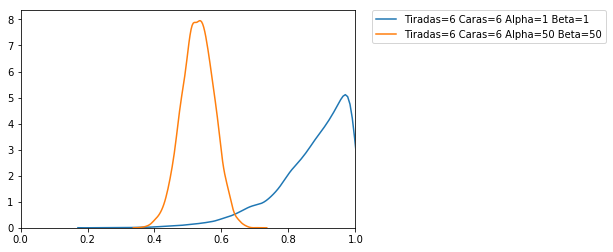

In [3]:
ax = sns.kdeplot(trace_6611['theta'], label = 'Tiradas=6 Caras=6 Alpha=1 Beta=1')
ax.set_xlim([0, 1])

ax = sns.kdeplot(trace_665050['theta'], label = 'Tiradas=6 Caras=6 Alpha=50 Beta=50')
ax.set_xlim([0, 1])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


### Calcula el MAP (máximo a posteriori) y las medias de ambas posterioris

In [4]:
od = collections.OrderedDict()
od['Tiradas'] = pd.Series([6, 6])
od['Caras'] = pd.Series([6, 6])
od['Alpha'] = pd.Series([1, 50])
od['Beta'] = pd.Series([1, 50])
od['Map'] = pd.Series([model_map_6611, model_map_665050])
od['Mean'] = pd.Series([pm.df_summary(trace_6611)['mean']['theta'], pm.df_summary(trace_665050)['mean']['theta']])
df = pd.DataFrame(od)

display(df)


,Tiradas,Caras,Alpha,Beta,Map,Mean
0,6,6,1,1,0.999998462083,0.870901
1,6,6,50,50,0.528846153741,0.529248


### Prediga, para ambos priors, el resultado de una nueva tirada de moneda

In [5]:
print 'Próxima tirada Tiradas=6 Caras=6 Alpha=1 Beta=1:', post_pred_6611
print 'Próxima tirada Tiradas=6 Caras=6 Alpha=50 Beta=50:', post_pred_665050


Próxima tirada Tiradas=6 Caras=6 Alpha=1 Beta=1: {'k': array([6])}
Próxima tirada Tiradas=6 Caras=6 Alpha=50 Beta=50: {'k': array([5])}


### Repita los puntos anteriores para una situación en la que se observan 20 caras de 20 tiradas y otra en la que se observan 3 caras de 3 tiradas

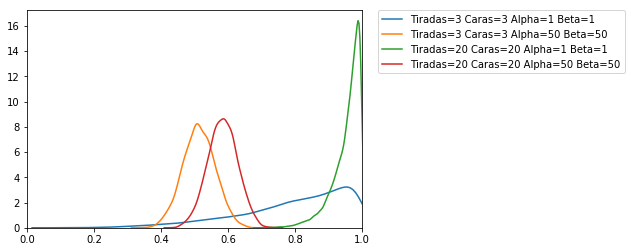

,Tiradas,Caras,Alpha,Beta,Map,Mean
0,3,3,1,1,0.999996924164,0.799135
1,3,3,50,50,0.514851485143,0.513732
2,20,20,1,1,0.999999615521,0.955709
3,20,20,50,50,0.584745760743,0.584259


Próxima tirada Tiradas=3 Caras=3 Alpha=1 Beta=1: {'k': array([2])}
Próxima tirada Tiradas=3 Caras=3 Alpha=50 Beta=50: {'k': array([2])}
Próxima tirada Tiradas=20 Caras=20 Alpha=1 Beta=1: {'k': array([20])}
Próxima tirada Tiradas=20 Caras=20 Alpha=50 Beta=50: {'k': array([13])}


In [6]:
ax = sns.kdeplot(trace_3311['theta'], label = 'Tiradas=3 Caras=3 Alpha=1 Beta=1')
ax.set_xlim([0, 1])

ax = sns.kdeplot(trace_335050['theta'], label = 'Tiradas=3 Caras=3 Alpha=50 Beta=50')
ax.set_xlim([0, 1])

ax = sns.kdeplot(trace_202011['theta'], label = 'Tiradas=20 Caras=20 Alpha=1 Beta=1')
ax.set_xlim([0, 1])

ax = sns.kdeplot(trace_20205050['theta'], label = 'Tiradas=20 Caras=20 Alpha=50 Beta=50')
ax.set_xlim([0, 1])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

od = collections.OrderedDict()
od['Tiradas'] = pd.Series([3, 3, 20, 20])
od['Caras'] = pd.Series([3, 3, 20, 20])
od['Alpha'] = pd.Series([1, 50, 1, 50])
od['Beta'] = pd.Series([1, 50, 1, 50])
od['Map'] = pd.Series([model_map_3311, model_map_335050, model_map_202011, model_map_20205050])
od['Mean'] = pd.Series([pm.df_summary(trace_3311)['mean']['theta'], pm.df_summary(trace_335050)['mean']['theta'], pm.df_summary(trace_202011)['mean']['theta'], pm.df_summary(trace_20205050)['mean']['theta']])
df = pd.DataFrame(od)

display(df)

print 'Próxima tirada Tiradas=3 Caras=3 Alpha=1 Beta=1:', post_pred_3311
print 'Próxima tirada Tiradas=3 Caras=3 Alpha=50 Beta=50:', post_pred_335050
print 'Próxima tirada Tiradas=20 Caras=20 Alpha=1 Beta=1:', post_pred_202011
print 'Próxima tirada Tiradas=20 Caras=20 Alpha=50 Beta=50:', post_pred_20205050


#### Qué puede concluir de los priors elegidos? Y del modelo en general?

### Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros de prior Beta